Real Estate

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [110]:
estate=pd.read_csv(r"C:\Users\DELL\Downloads\Real estate.csv")

In [111]:
estate.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [112]:
estate.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [113]:
estate.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [114]:
estate.shape

(414, 8)

In [115]:
estate.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [116]:
list(estate.columns)

['No',
 'X1 transaction date',
 'X2 house age',
 'X3 distance to the nearest MRT station',
 'X4 number of convenience stores',
 'X5 latitude',
 'X6 longitude',
 'Y house price of unit area']

Exploratory Data Analysis

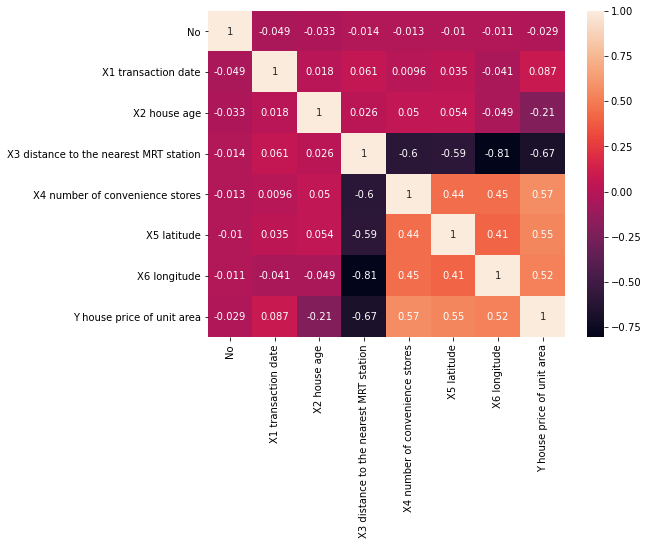

In [117]:
plt.figure(figsize=(8,6))
sns.heatmap(estate.corr(),annot=True)

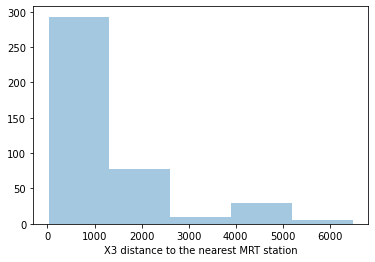

In [118]:
sns.distplot(estate['X3 distance to the nearest MRT station'],kde=False, bins=5)

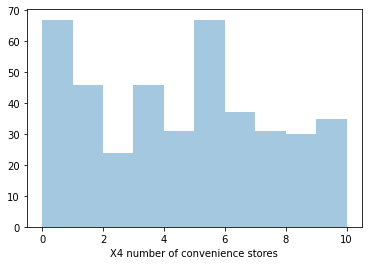

In [119]:
sns.distplot(estate['X4 number of convenience stores'],kde=False,bins=10)

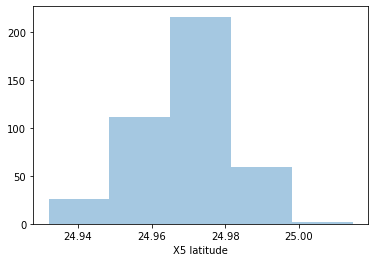

In [120]:
sns.distplot(estate['X5 latitude'],kde=False,bins=5)

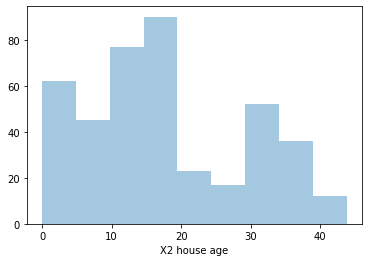

In [121]:
sns.distplot(estate['X2 house age'],kde=False)

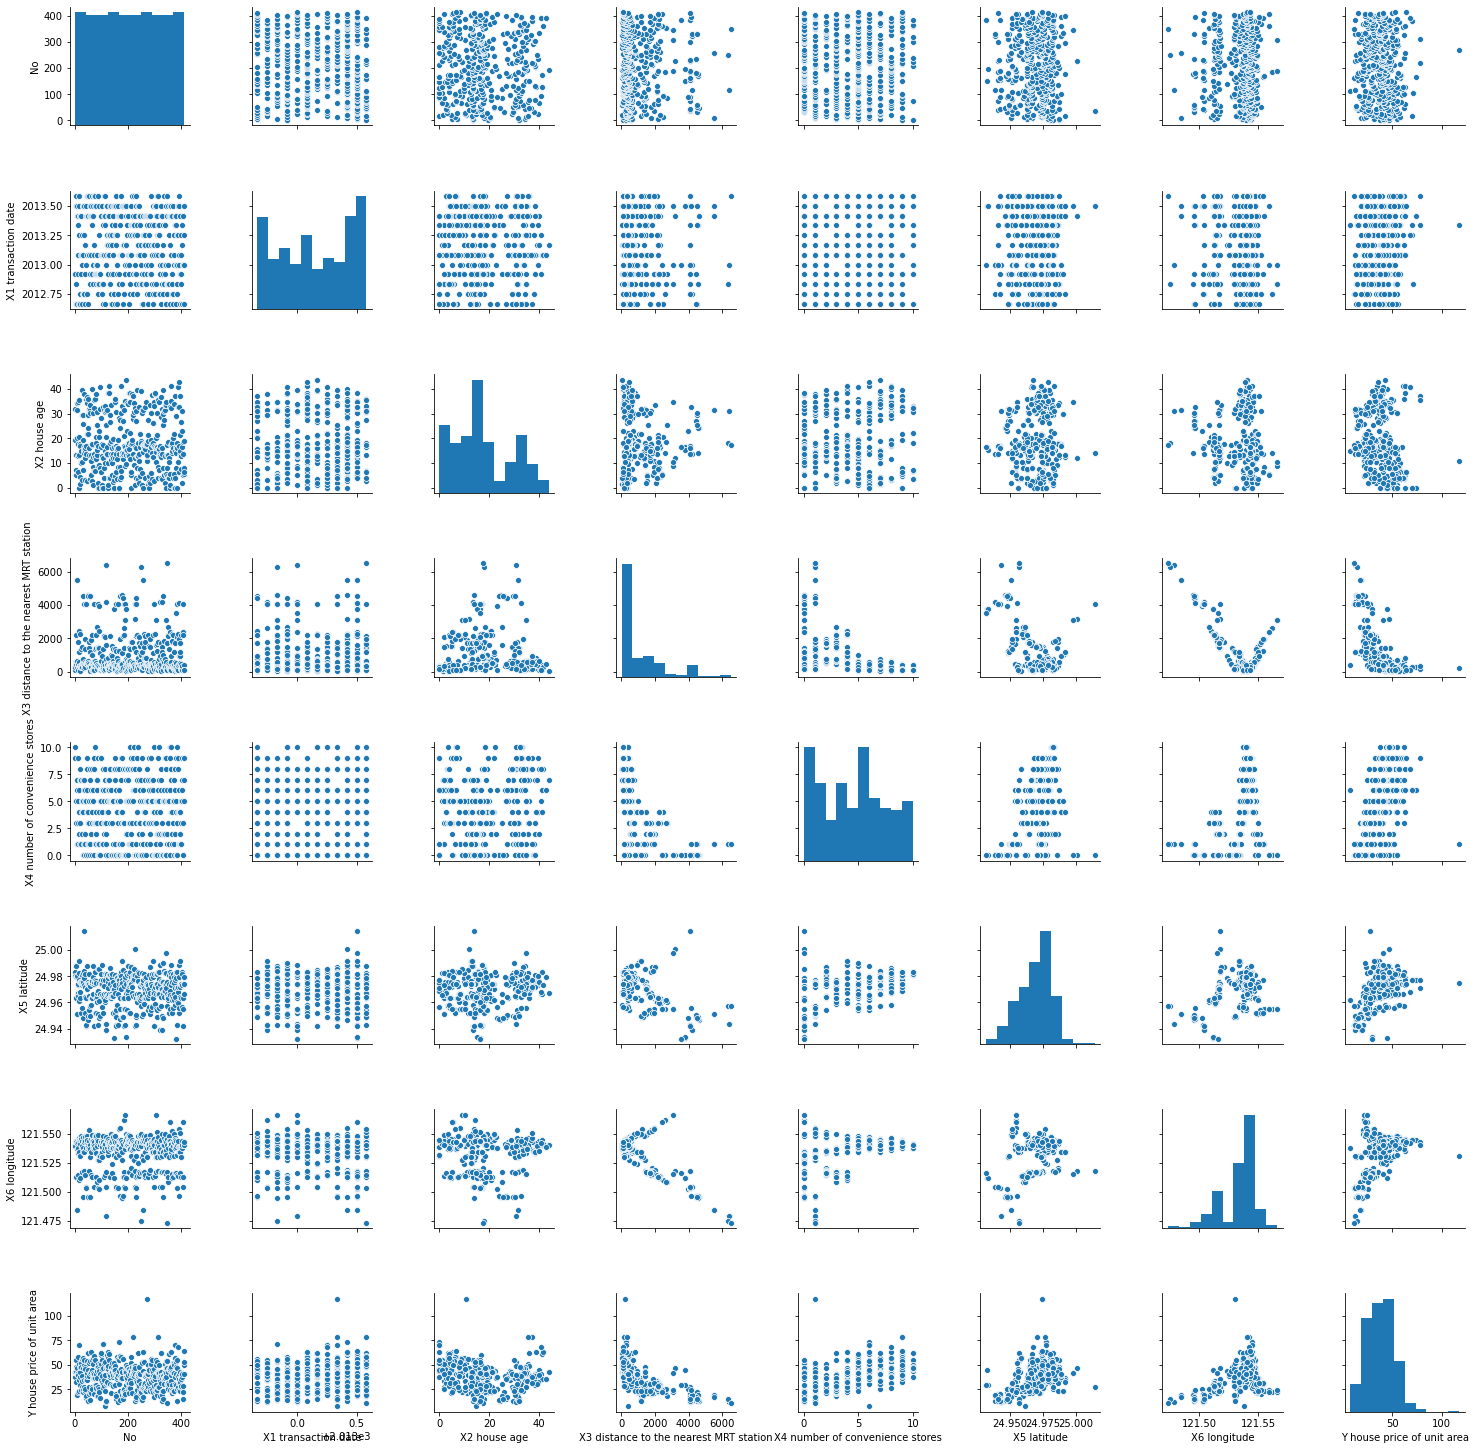

In [122]:
sns.pairplot(estate)

In [125]:
estate.drop('No',axis=1,inplace=True)
estate.drop('X1 transaction date',axis=1,inplace=True)

In [126]:
X=estate[['X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y=estate['Y house price of unit area']

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.4, random_state=101)

In [129]:
from sklearn.linear_model import LinearRegression

In [130]:
lm=LinearRegression()

In [131]:
lm.fit(X_train,y_train)

LinearRegression()

In [132]:
print(lm.intercept_)

-4229.267892570605


In [133]:
print(lm.coef_)

[-2.87589333e-01 -4.62269977e-03  1.04958764e+00  2.42814162e+02
 -1.47224350e+01]


In [134]:
dataframe=pd.DataFrame(lm.coef_,X.columns, columns=['Coeff'])
dataframe

,Coeff
X2 house age,-0.287589
X3 distance to the nearest MRT station,-0.004623
X4 number of convenience stores,1.049588
X5 latitude,242.814162
X6 longitude,-14.722435


In [135]:
prediction=lm.predict(X_test)

In [136]:
prediction

array([14.77852916,  8.35848599, 23.1113017 , 47.67384657, 30.05251015,
       37.468435  , 38.01762284, 41.08294225, 46.50080685, 40.34536509,
       43.87818623, 33.77279613, 40.08116941, 37.31066596, 46.15211908,
       48.22093568, 39.48594154, 46.43844951, 49.94962395, 47.552992  ,
       41.60580876, 52.60152777, 47.16226231, 37.48194878, 32.40811002,
       50.67597957, 39.35917038, 47.99287312, 45.4694465 , 39.33112551,
       49.61736207, 42.53188577, 42.96261018, 46.15577268, 44.94124757,
        7.13730951, 39.15074038, 39.77497805,  7.07979164, 54.43242047,
       31.26660065, 46.90435905, 24.89017208, 48.80711134, 42.6710441 ,
       50.08982154, 41.0044385 , 37.39701978, 44.86394799, 36.76558821,
       46.8133099 , 35.89912014, 42.35933217, 14.7421879 , 38.74428879,
       47.50157796, 43.06612319, 45.44985241, 43.77496083, 39.48259244,
       34.31225036, 45.52392252, 42.44560897, 42.0625614 , 51.89857656,
       42.74806676, 24.28752167, 48.68058491, 31.25018334, 40.06

In [108]:
df=pd.DataFrame({'Actual':y_test, 'Predictions':prediction})
df

,Actual,Predictions
176,19.2,13.513578
347,11.2,9.948463
307,24.7,20.634310
299,46.1,47.204777
391,31.3,31.462361
...,...,...
33,49.3,47.339931
289,44.5,47.704205
74,54.4,53.380178
400,35.5,40.730250


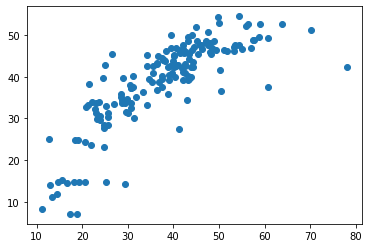

In [137]:
plt.scatter(y_test, prediction)

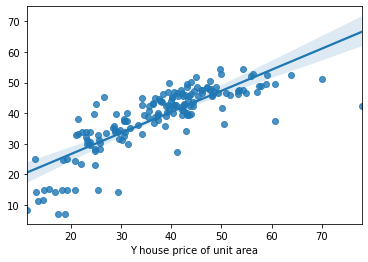

In [138]:
sns.regplot(y_test, prediction, data=estate)

Evaluating the model

In [139]:
from sklearn import metrics

In [140]:
a=metrics.mean_absolute_error(y_test, prediction)
a

5.550201321415828

In [141]:
b=metrics.mean_squared_error(y_test, prediction)
b

54.3757285449251

In [142]:
c=np.sqrt(metrics.mean_squared_error(y_test, prediction))
c

7.373990001683288